In [6]:
import sys
sys.path.insert(0, "..")
from classes.stat_phys.potentials1 import H_Metro_MonteCarlo as H_metro
import matplotlib.pyplot as plt
import numpy as np
plt.rc('animation', html='jshtml')

In [7]:
def gauss(xs, x0, spread):
    return np.exp(-((xs-x0)**2)/spread**2)

def v_pot(xs):
    return -2.0*gauss(xs, 1.5, 0.5)-0.75*gauss(xs, 8.5, 5.5)

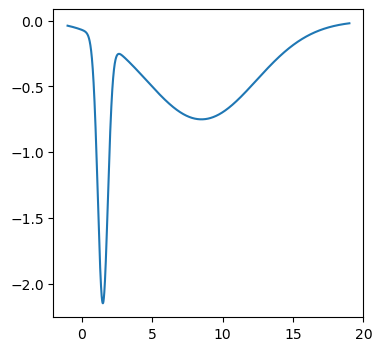

In [9]:
fig, ax = plt.subplots(figsize=(4,4))
xs = np.linspace(-1.0,19.0, 3000)
ax.plot(xs, v_pot(xs))

In [24]:
def proposal_func(x, x_min=0.0, x_max=19.0):
    return (x_min + (x_max-x_min)*np.random.rand(1))[0]

temps = [0.05, 0.15, 0.25, 0.35, 0.65]
pots = []
v_func_args = {}
prop_args = {}
for temp in temps:
    pot = H_metro(T=temp, v_func=v_pot, v_func_args=v_func_args, x0=6.5, proposal_func=proposal_func, proposal_func_args=prop_args, N=4000)
    pots.append(pot)

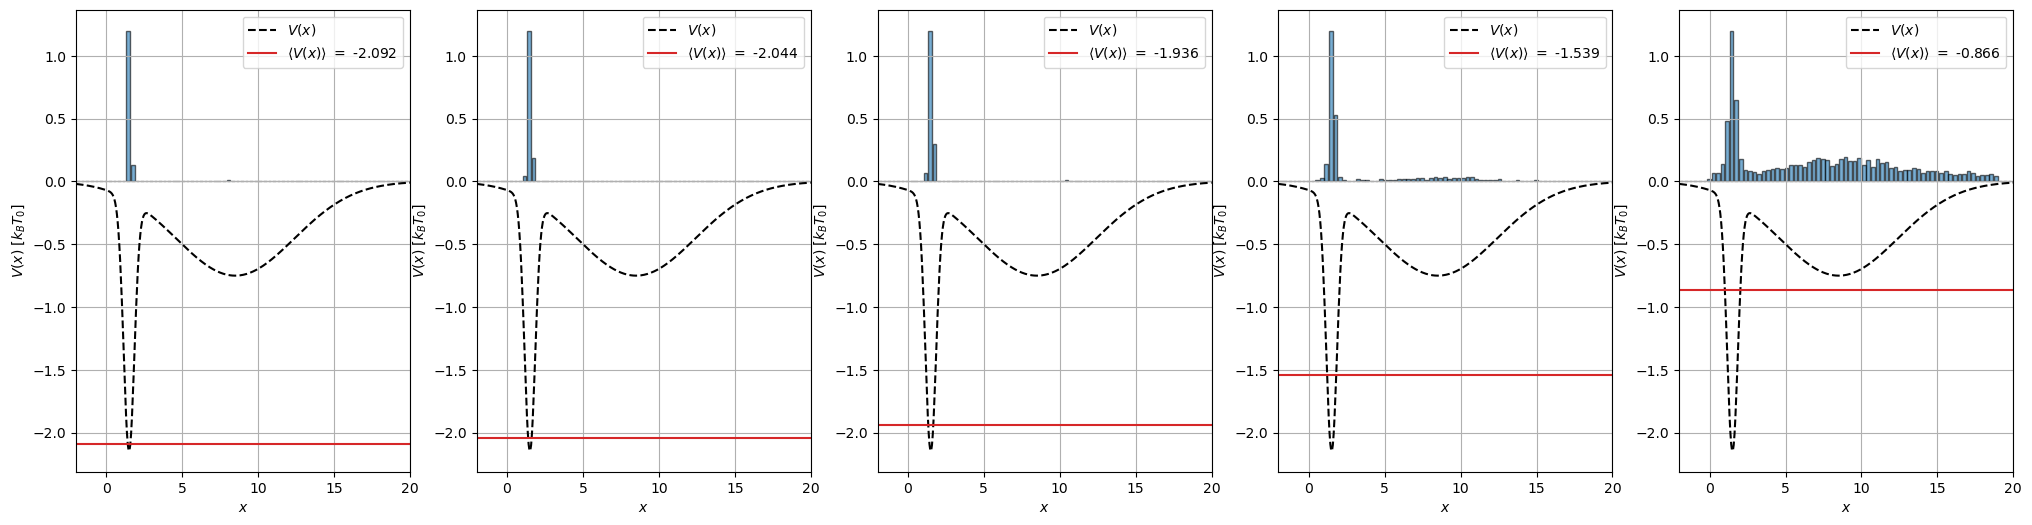

In [28]:
fig, axs= plt.subplots(1, 5, figsize=(25,6))
for ax, pot in zip(axs, pots):
    ax.grid()
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$V(x)$ $[k_BT_{0}]$")
    ax.set_xlim([-2,20])
    #ax.set_ylim([0,2])
    pot.plot(ax, plot_range=[-2.0, 20.0], bin_size=0.3)
    ax.legend()